In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
data = pd.read_csv('iris.data', names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'])
print(data)
#df = pd.DataFrame(data)
dataMat = data.drop(columns='Species')
D = dataMat.to_numpy()
#print(data.iloc[:][1])
range(len(data)-1)
type(D)
#D[:,0]
classLabels = []
for line in range(len(data)):
    if data.iloc[line][4] == 'Iris-setosa':
        classLabels.append(0)
    elif data.iloc[line][4] == 'Iris-versicolor':
        classLabels.append(1)
    elif data.iloc[line][4] == 'Iris-virginica':
        classLabels.append(2)
len(classLabels)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


150

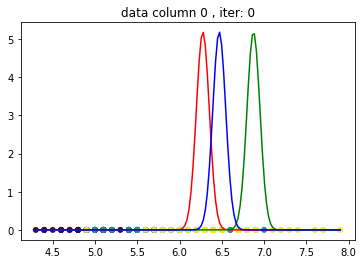

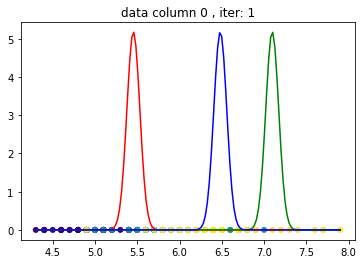

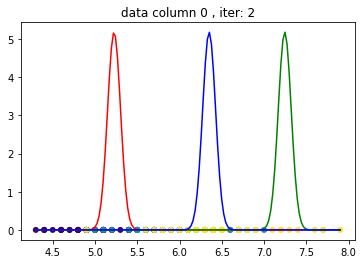

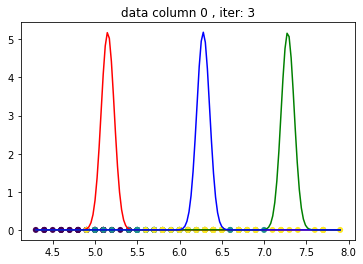

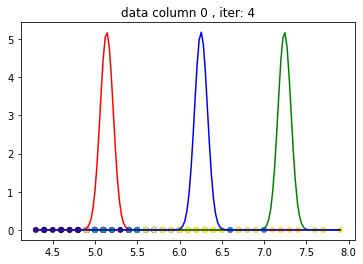

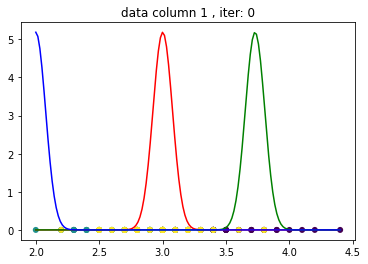

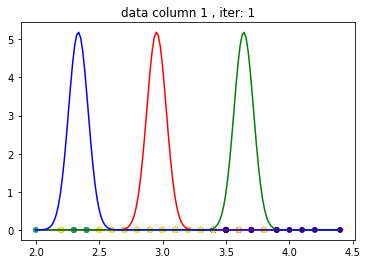

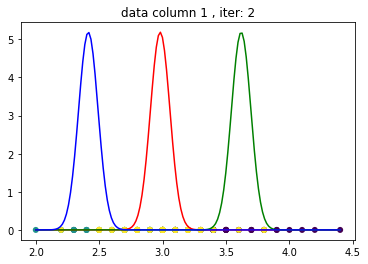

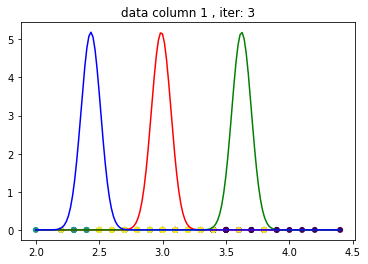

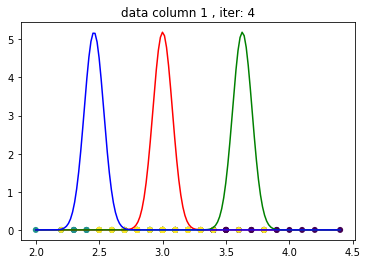

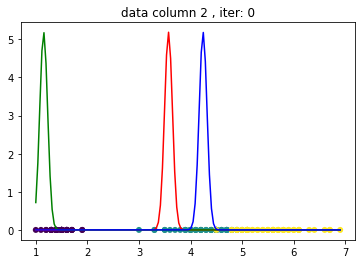

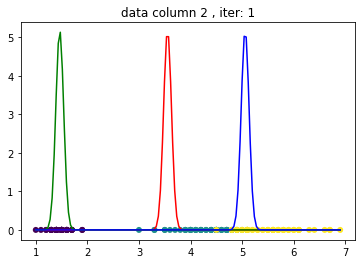

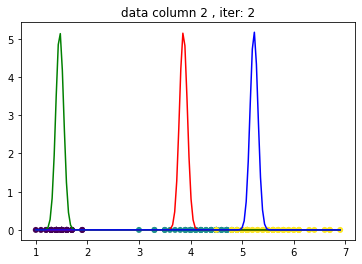

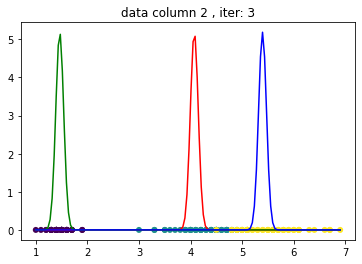

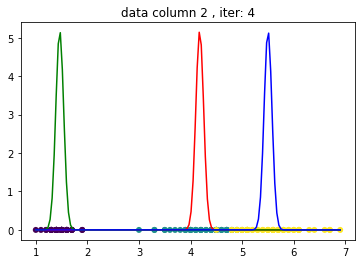

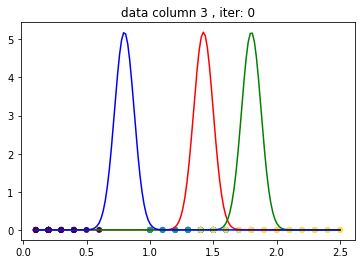

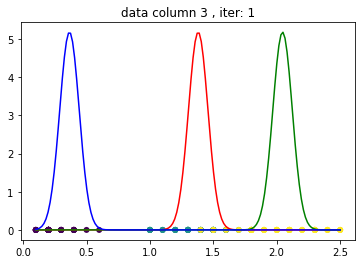

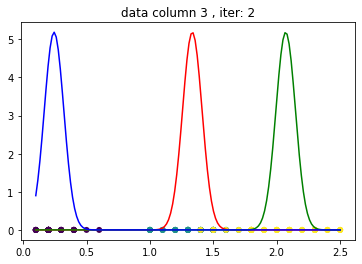

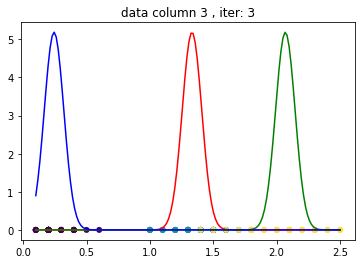

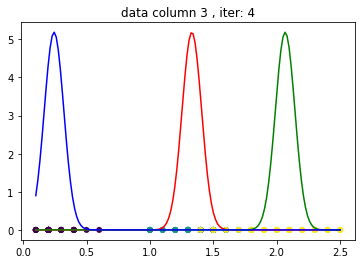

In [10]:
from scipy.stats import multivariate_normal
from scipy.stats import norm

class GMM:

# create array r for each datapoint xi the probability r[i] that datapoint xi belongs to cluster c
    def __init__(self,col,k,X,iterations):
        #input col-data column to analyze, k-classes, X-dataMat, iteration-iterations to operate
        self.col = col
        self.k = k
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None
        self.y = np.zeros(len(X)) #data scatter plot base line
    
    def fit_run(self):
        #now suedo assign random initial values, consider used seed() / random later
        self.n = self.X.shape
        random_row = np.random.uniform(low=self.X.min(), high=self.X.max(), size=self.k)
        self.mu = random_row
        self.pi = np.full(shape=self.k, fill_value=1/self.k)#[]
        self.var = np.full(shape=self.k, fill_value=1/self.k)#[.6,.4,.3]
    
        # step-E
        for iter in range(self.iterations):
            r = np.zeros((len(dataL1),3))
        # Probability for each datapoint x_i to belong to gaussian g
            for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                               norm(loc=self.mu[1],scale=self.var[1]),
                                               norm(loc=self.mu[2],scale=self.var[2])],self.pi):
        #         classLabels = np.array(classLabels)
        #         ind = np.where(classLabels==c)
                r[:,c] = p*g.pdf(self.X)
            # Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to cluster c
            for i in range(len(r)):
                r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i])

            #print(np.shape(r))
            #np.shape(dataL1)
            # data plot
            fig1, ax1 = plt.subplots()
            ax1.set_title('data column %d , iter: %d' %(self.col,iter))
            ax1 = plt.scatter(self.X, self.y, c=classLabels, edgecolors='none')
            #ax1 = plt.hist(self.X)
            # plot gaussians
            for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(self.X.min(),self.X.max(),num=len(self.X))),
                                    norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(self.X.min(),self.X.max(),num=len(self.X))),
                                    norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(self.X.min(),self.X.max(),num=len(self.X)))],['r','g','b']):
                ax1 = plt.plot(np.linspace(self.X.min(),self.X.max(),num=len(self.X)),g,c=c)

            #step-M
            # calculate m_c
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m)
            #calculate pi_c/For each cluster c, calculate the fraction of points pi_c
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c))
            #calculate mu_c
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c
            #calculate var_c
            var_c=[]
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(len(self.X),1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))

            plt.show()
n,m = np.shape(D)
for i in range(m):
    dataL1 = D[:,i]
    np.random.seed(i)    
    gmm = GMM(i,13,dataL1,5)
    gmm.fit_run()


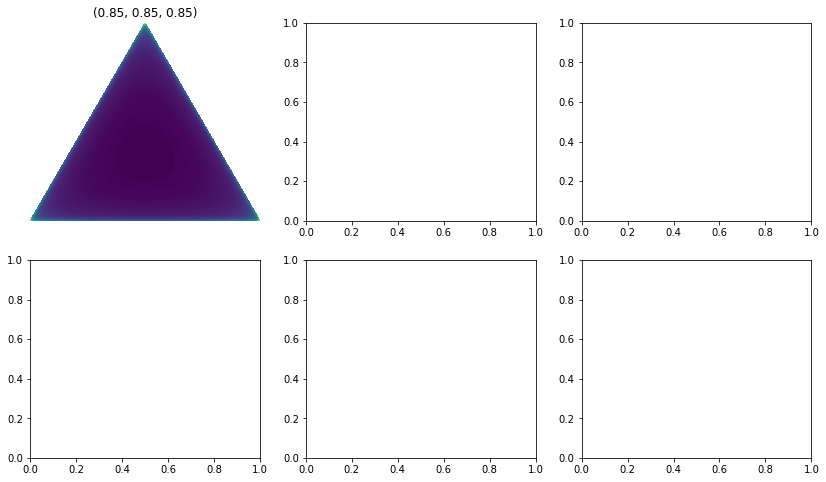

In [11]:
#try other probability function
import math
import matplotlib.tri as tri
import seaborn as sns
from math import gamma
from operator import mul
from functools import reduce
class DirichletProcessing():
    def __init__(self, dataMat, alpha):
        self.dataMat = dataMat
        self.alpha = alpha
        self.cache = []
        self.weights = []
        self.total_stick_used = 0.

    def __call__(self):
        remaining = 1.0 - self.total_stick_used
        i = DirichletProcessing.roll_die(self.weights + [remaining])
        if i is not None and i < len(self.weights) :
            return self.cache[i]
        else:
            stick_piece = beta(1, self.alpha).rvs() * remaining
            self.total_stick_used += stick_piece
            self.weights.append(stick_piece)
            new_value = self.base_measure()
            self.cache.append(new_value)
            return new_value

    @staticmethod
    def roll_die(weights):
        if weights:
            return choice(range(len(weights)), p=weights)
        else:
            return None

class Dirichlet:
    """Define the Dirichlet distribution with vector parameter alpha."""
    def __init__(self, alpha):
        
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    
    def pdf(self, x):
        """Returns pdf value for `x`. """
        return self._coef * reduce(mul, [xx ** (aa-1) for (xx, aa) in zip(x, self._alpha)])

class PlotDirichlet:
    """
    Plot the Dirichlet distribution as a contour plot on a 2-Simplex.
    """
    def __init__(self, corners):
        self._corners = corners
        self._triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
        # Midpoints of triangle sides opposite of each corner
        self._midpoints = [(corners[(i+1) % 3] + corners[(i+2) % 3]) / 2.0 for i in range(3)]
        
    def xy2bc(self, xy, tol=1.e-3):
        """Map the x-y coordinates of the mesh vertices to the simplex coordinate space (aka barycentric coordinates).
        Here we use a simple method that uses vector algebra. For some values of alpha, calculation of the Dirichlet pdf 
        can become numerically unstable at the boundaries of the simplex so our conversion function will take an optional 
        tolerance that will avoid barycentric coordinate values directly on the simplex boundary.        
        """
        s = [(self._corners[i] - self._midpoints[i]).dot(xy - self._midpoints[i]) / 0.75 for i in range(3)]
        return np.clip(s, tol, 1.0-tol)
        
    def draw_pdf_contours(self, ax, dist, label=None, nlevels=200, subdiv=8, **kwargs):
        """Draw pdf contours for a Dirichlet distribution"""
        # Subdivide the triangle into a triangular mesh
        refiner = tri.UniformTriRefiner(self._triangle)
        trimesh = refiner.refine_triangulation(subdiv=subdiv)
        
        # convert to barycentric coordinates and compute probabilities of the given distribution 
        pvals = [dist.pdf(self.xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    
        ax.tricontourf(trimesh, pvals, nlevels, **kwargs)
        #plt.axis('equal')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 0.75**0.5)
        ax.set_title(str(label))
        ax.axis('off') 
        return ax
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
plot_dirichlet = PlotDirichlet(corners)

f, axes = plt.subplots(2, 3, figsize=(14, 8))
ax = axes[0, 0]
alpha = (0.85, 0.85, 0.85)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)
plt.show()
#type(dist)

5.006 0.3489469873777391
5.936 0.5109833656783751
6.587999999999998 0.6294886813914926
3.418 0.37719490982779713
2.7700000000000005 0.31064449134018135
2.974 0.3192553836664309
1.464 0.17176728442867112
4.26 0.4651881339845203
5.5520000000000005 0.546347874526844
0.244 0.10613199329137281
1.3259999999999998 0.19576516544063705
2.0260000000000002 0.2718896835115301


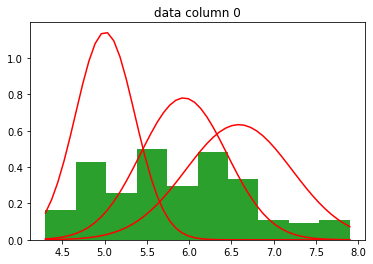

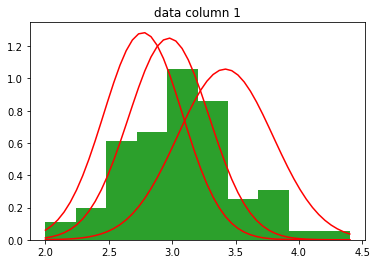

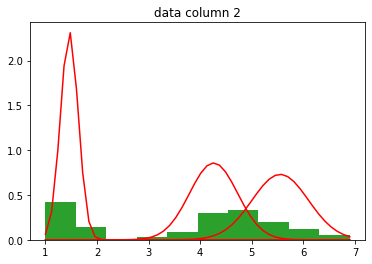

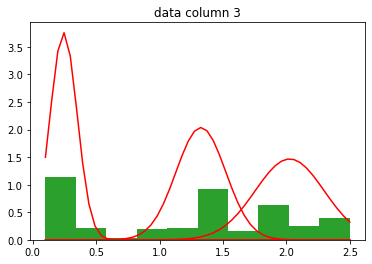

In [51]:
#data distribution with normal distribution over all the columns of data 
import scipy
for n in range(13):
    dataL1=D[:,n]
    fig1, ax1 = plt.subplots()
    plt.title('data column %d'%n)
    for i in range(3):
        class_ind=np.where(np.array(classLabels)==i)
        mean, var  = scipy.stats.distributions.norm.fit(dataL1[class_ind])
        x = np.linspace(dataL1.min(),dataL1.max(),50)
        fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)
        ax1 = plt.hist(dataL1, density=True)
        ax1 = plt.plot(x,fitted_data,'r-')
        print(mean,var)


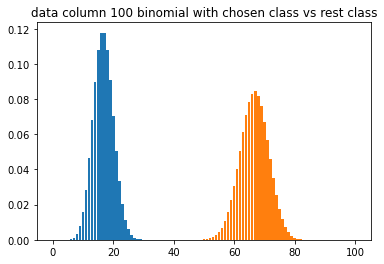

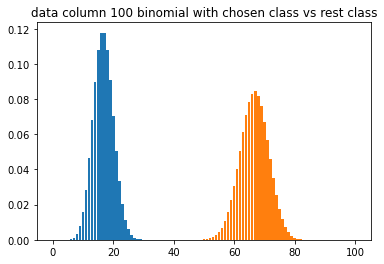

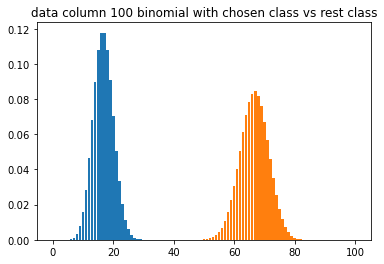

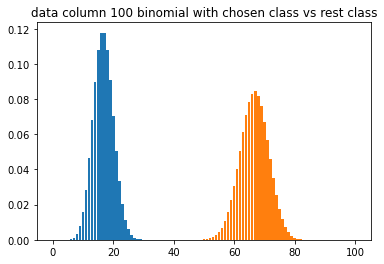

In [53]:
#binom
from scipy.stats import binom, norm
for n in range(4):
    dataL1=D[:,n]
    fig, ax = plt.subplots(1, 1)
    class_ind=np.where(np.array(classLabels)==0)
    class_data = dataL1[class_ind]
    n, p = 50, 1/3
    r_values = list(range(n+1))
    mean, var = binom.stats(n, p)
    dist = [binom.pmf(r, n, p) for r in r_values ] 
    ax = plt.bar(r_values, dist) 


    #fig2, ax2 = plt.subplots(1, 1)
    class_ind=np.where(np.array(classLabels)==1)
    class_data = dataL1[class_ind]
    n, p = 100, 2/3
    r_values = list(range(n+1))
    mean, var = binom.stats(n, p)
    dist = [binom.pmf(r, n, p) for r in r_values ]
    ax1 = plt.bar(r_values, dist) 
    plt.title('data column %d binomial with chosen class vs rest class'%n)
    plt.show()


Beta distribution

In [81]:
from scipy.stats import beta
iris = dataMat.to_numpy()
a, b = .2, .5
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
dist = beta.pdf(iris[:,3], a, b, loc=0, scale=1)
#plt.plot(linspacedist)
print("mean:",mean, "var:", var)

mean: 0.28571428571428575 var: 0.1200480192076831


Bernoulli distribution

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.

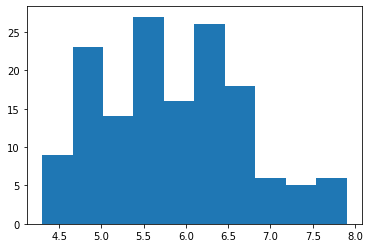

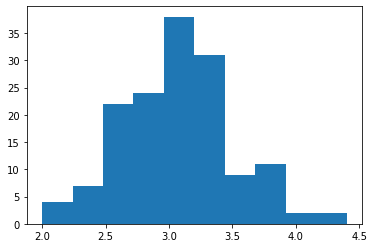

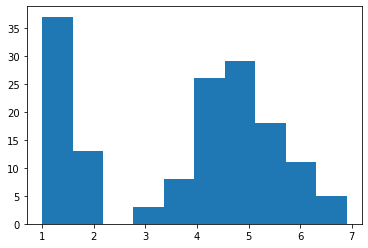

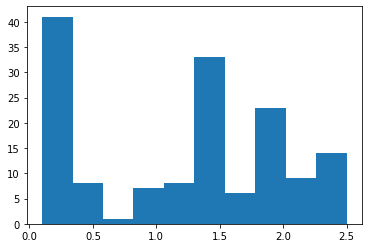

In [98]:
from scipy.stats import bernoulli
for n in range(4):    
    fig, ax = plt.subplots(1, 1)
    p = 1/3
    #ax.plot(iris[:,0], bernoulli.cdf(iris[:,0], p))
    ax.hist(iris[:,n])
    dist = bernoulli.pmf(iris[:,n], p)
    #mean[n], var[n], skew[n], kurt[n] = bernoulli.stats(p, moments='mvsk')
    bernoulli.pmf(iris[:,n],p)
    print(dist)
#     g = norm(loc=mean, scale=var)
#     ax.plot(g)
#     print("mean in column %d:",mean %n)

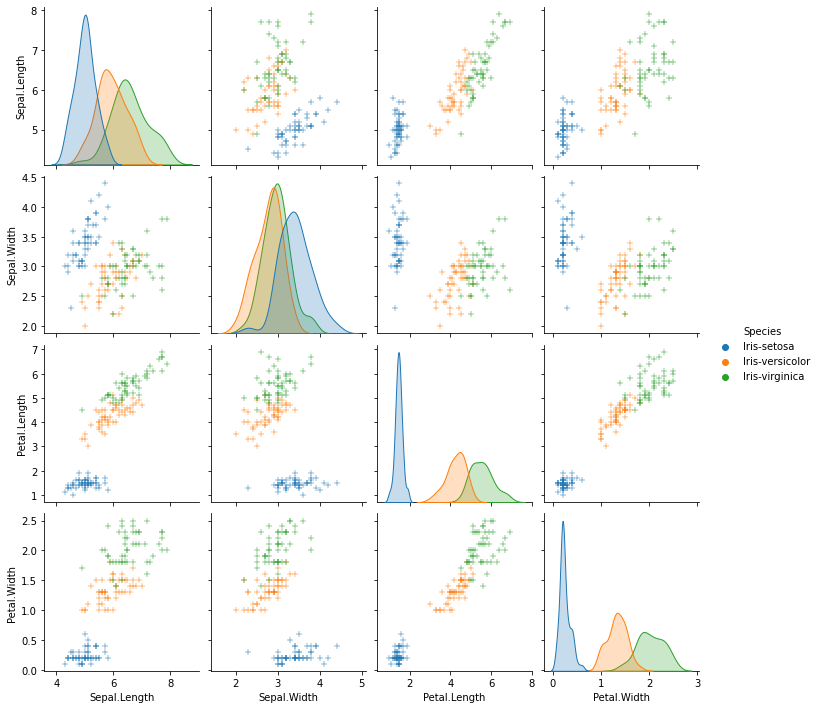

In [15]:
# visualization-- for back check
g = sns.pairplot(data, hue='Species', markers='+')
plt.show()

Wine Data

GMM-EM

In [16]:
wine = pd.read_csv('wine.data', names=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
print(data)
#dataMat = data.drop(columns='Alcohol')
D = wine.to_numpy()
#classLabels = data(columns='Alcohol')
print(D)
#make classlabel
class1 = np.zeros((59,1))
class2 = np.ones((71,1))
class3 = 2*np.ones((48,1))
classLabels = np.append(class1,class2,axis=0)
classLabels = np.append(classLabels,class3, axis=0)
classLabels

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [18]:
#normalize data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(wine)
X_scaled_array = scaler.transform(wine)
winenorm = pd.DataFrame(X_scaled_array, columns = wine.columns)
winenorm.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


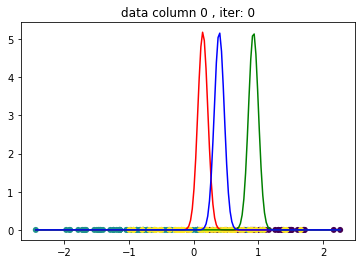

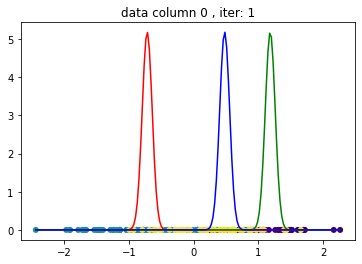

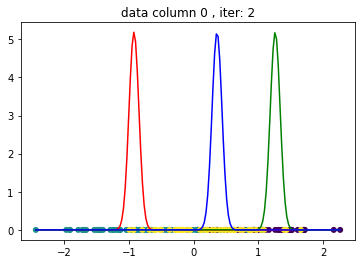

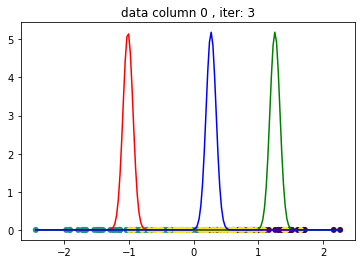

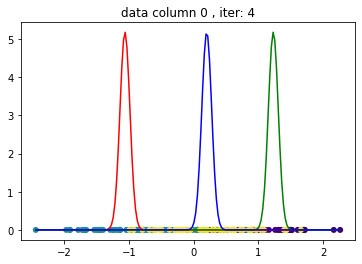

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

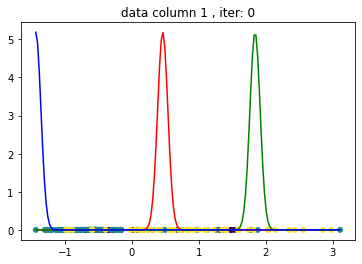

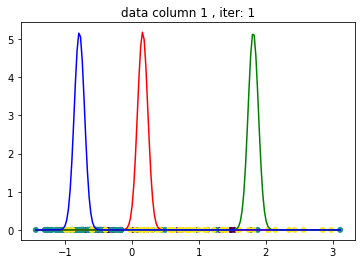

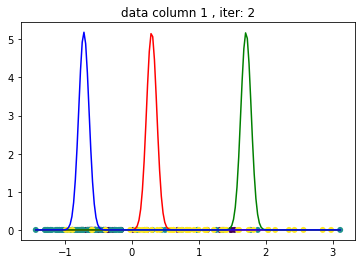

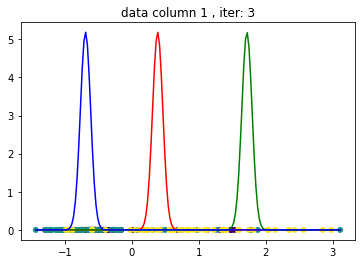

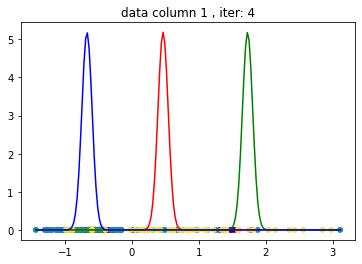

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

<ipython-input-29-374b43d20f1b>:36: RuntimeWarning: invalid value encountered in true_divide
  r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i]) # weights


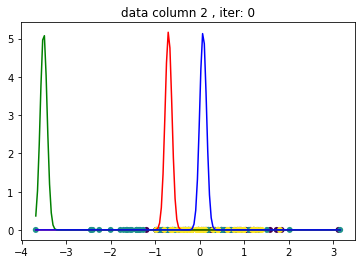

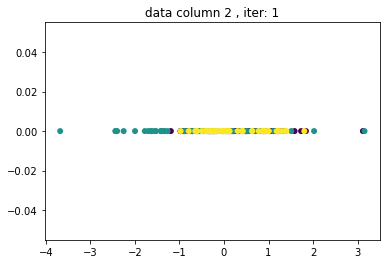

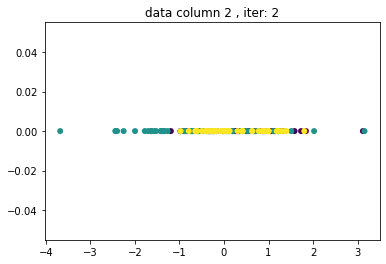

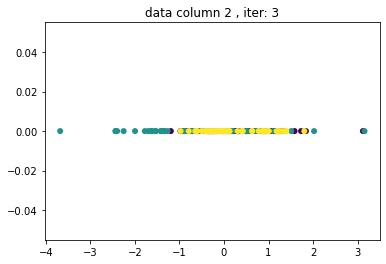

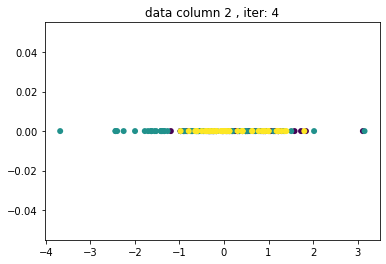

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

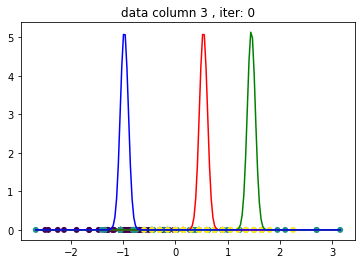

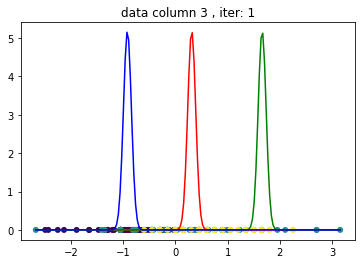

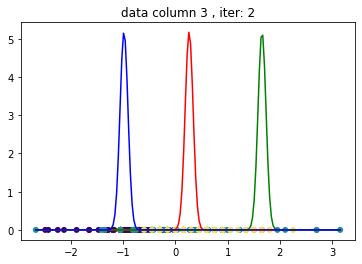

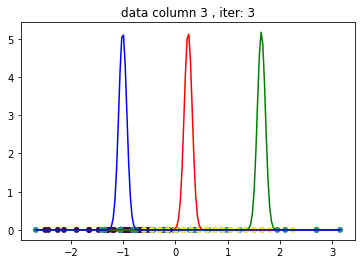

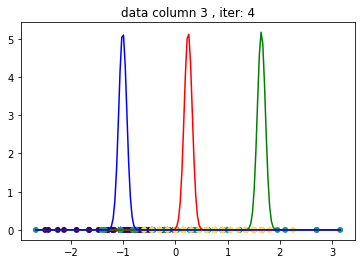

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

<ipython-input-29-374b43d20f1b>:36: RuntimeWarning: invalid value encountered in true_divide
  r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i]) # weights


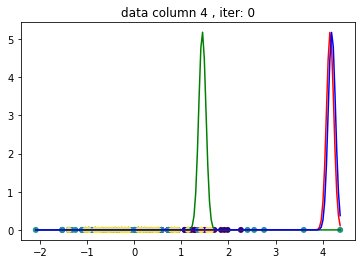

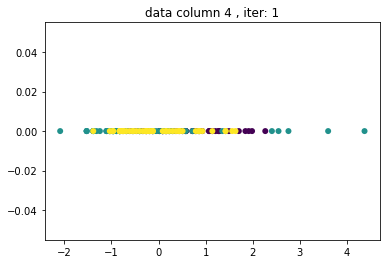

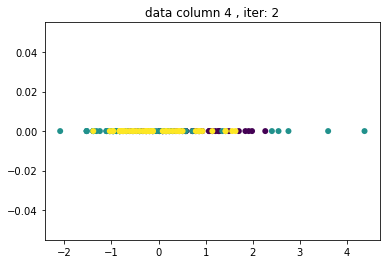

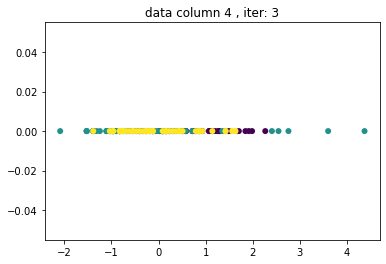

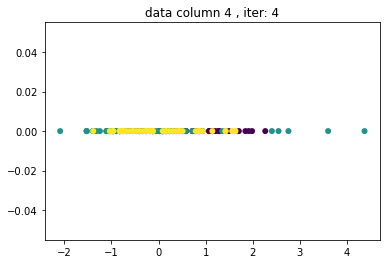

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

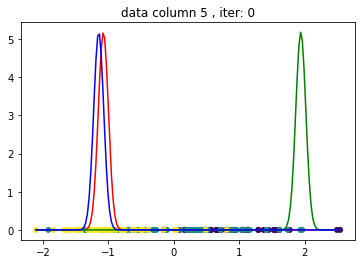

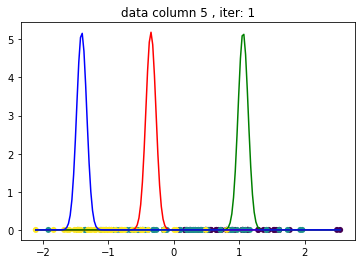

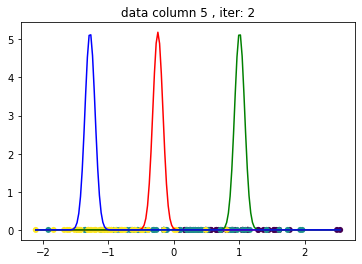

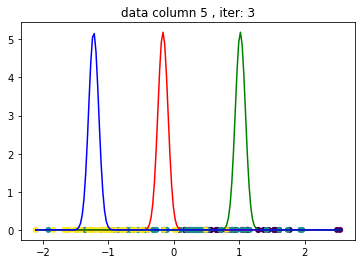

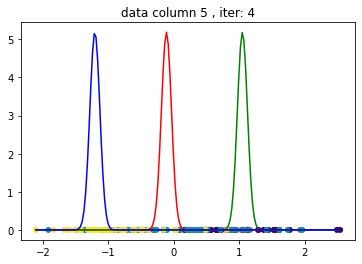

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

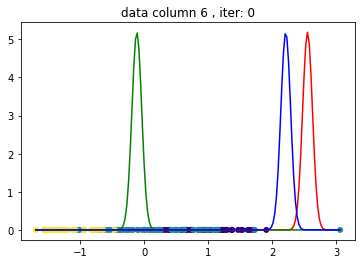

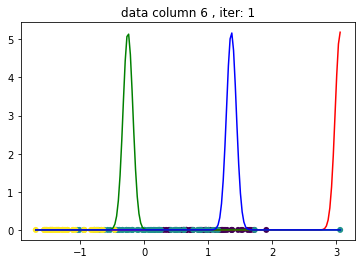

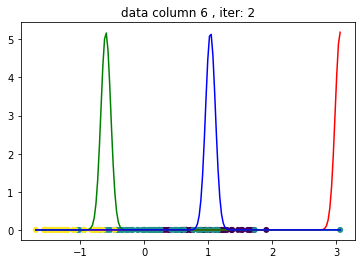

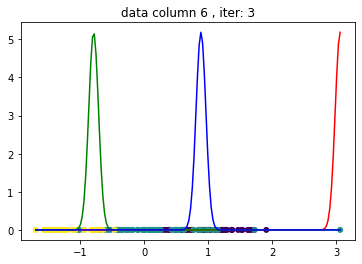

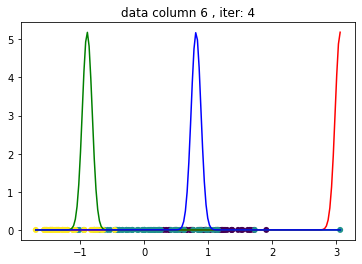

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

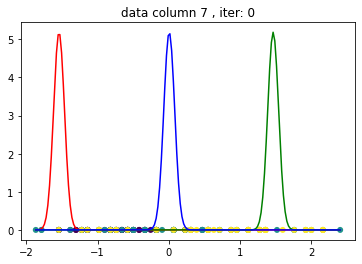

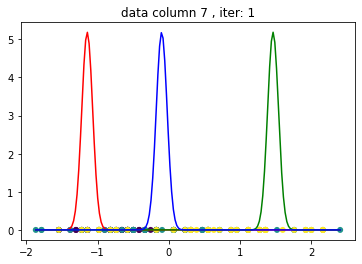

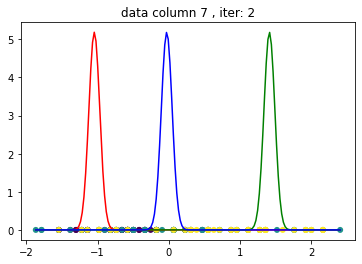

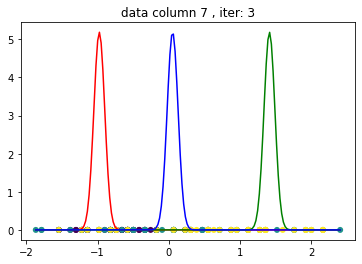

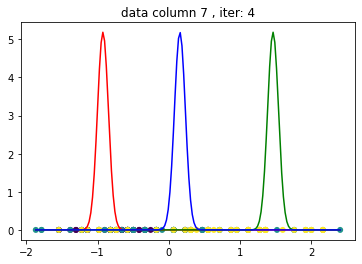

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

<ipython-input-29-374b43d20f1b>:36: RuntimeWarning: invalid value encountered in true_divide
  r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i]) # weights


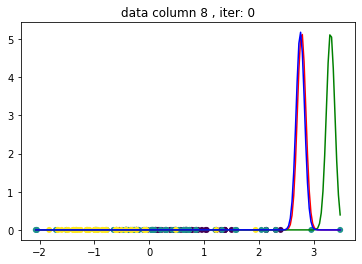

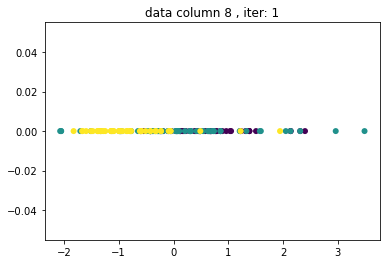

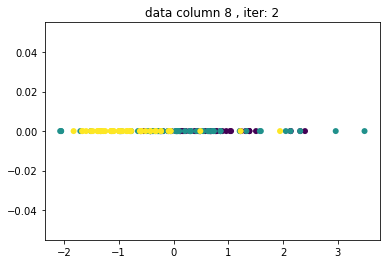

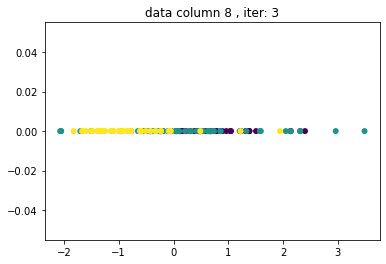

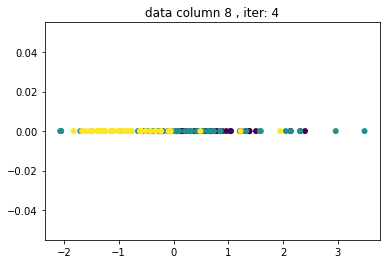

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

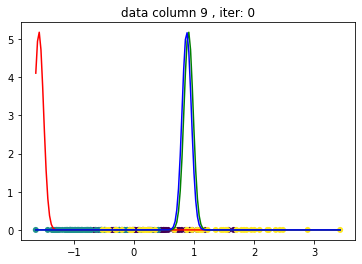

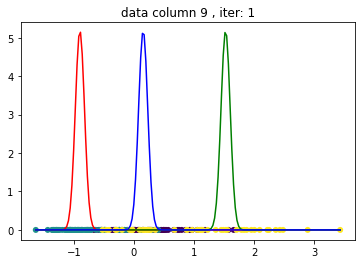

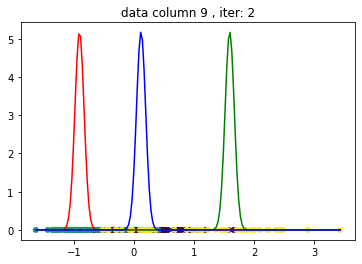

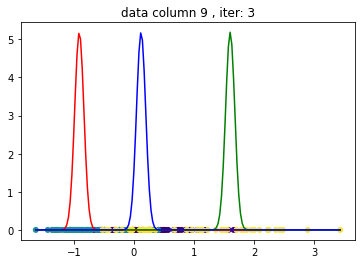

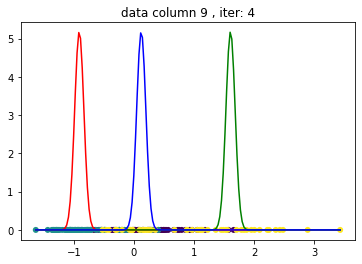

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

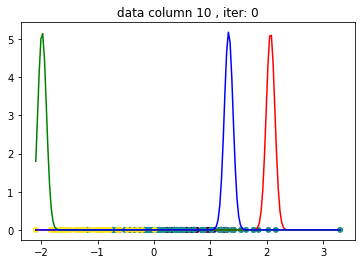

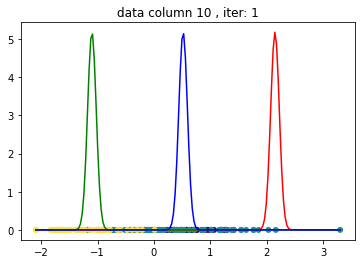

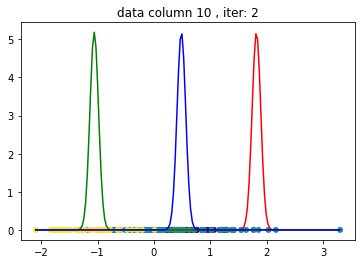

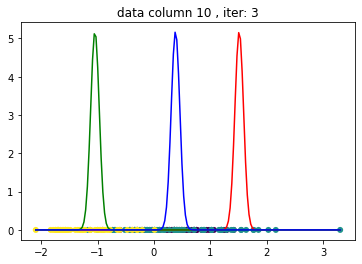

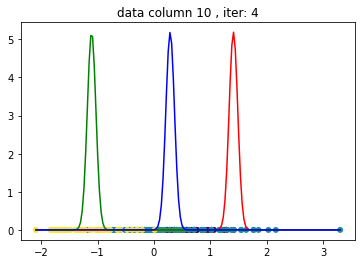

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

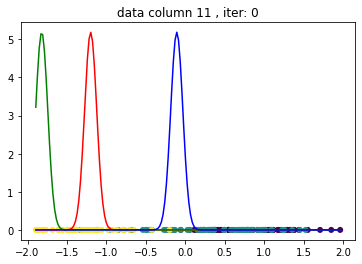

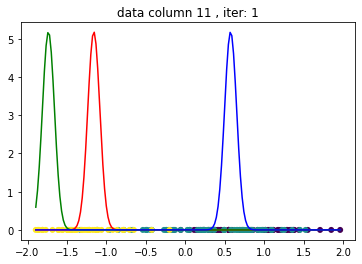

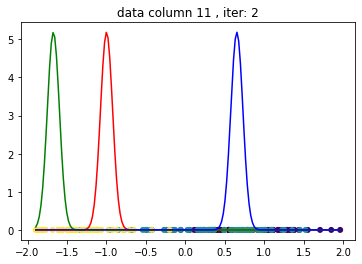

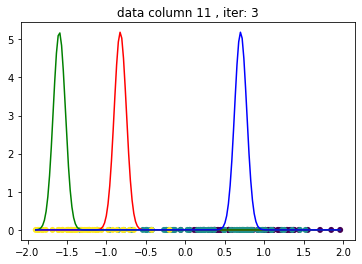

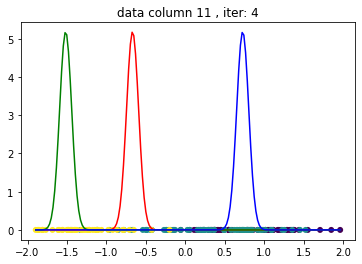

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

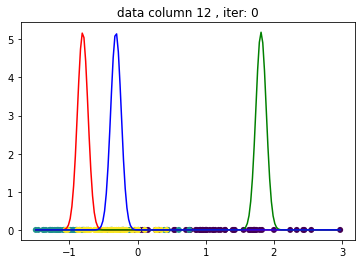

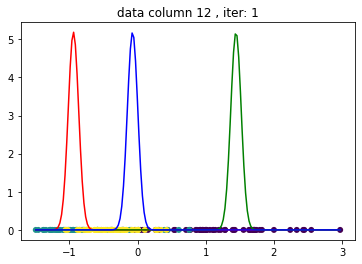

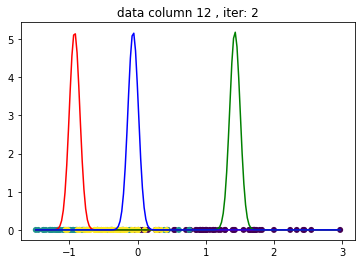

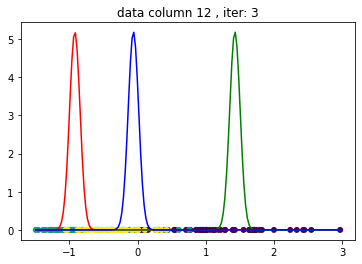

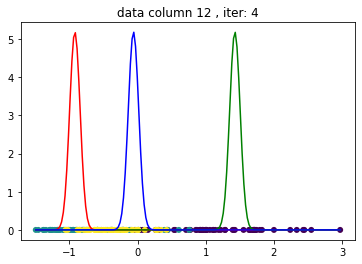

Weights: [[2.15101898e-241 1.00000000e+000 3.82935427e-061]
 [3.60361377e-063 3.30346817e-036 1.00000000e+000]
 [1.35449027e-058 6.23418473e-040 1.00000000e+000]
 [1.92906052e-270 1.00000000e+000 3.53556592e-074]
 [9.58739423e-068 1.75049384e-032 1.00000000e+000]
 [3.60632885e-235 1.00000000e+000 2.37830961e-058]
 [1.36688443e-274 1.00000000e+000 4.85695086e-076]
 [4.02127446e-206 1.00000000e+000 2.57593558e-045]
 [0.00000000e+000 1.00000000e+000 5.25132209e-117]
 [1.26038804e-164 1.00000000e+000 1.07618589e-026]
 [2.01899668e-214 1.00000000e+000 4.86121175e-049]
 [1.43061096e-218 1.00000000e+000 6.67804451e-051]
 [8.38265475e-142 1.00000000e+000 1.87677002e-016]
 [0.00000000e+000 1.00000000e+000 1.47451629e-109]
 [1.62382351e-272 1.00000000e+000 4.14391963e-075]
 [6.62298523e-117 9.99972076e-001 2.79235293e-005]
 [6.44161919e-256 1.00000000e+000 1.16356927e-067]
 [2.11312582e-158 1.00000000e+000 6.68390301e-024]
 [4.28422581e-233 1.00000000e+000 2.02915866e-057]
 [5.57516165e-119 9.99

In [29]:
from scipy.stats import multivariate_normal
from scipy.stats import norm

class GMM:

# create array r for each datapoint xi the probability r[i] that datapoint xi belongs to cluster c
    def __init__(self,col,k,X,iterations):
        #input col-data column to analyze, k-classes, X-dataMat, iteration-iterations to operate
        self.col = col
        self.k = k
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None
        self.y = np.zeros(len(X)) #data scatter plot base line
    
    def fit_run(self):
#now suedo assign random initial values, consider used seed() / random later
        self.n = self.X.shape
        random_row = np.random.uniform(low=self.X.min(), high=self.X.max(), size=self.k)
        self.mu = random_row
        self.pi = [59/178, 71/178, 48/178]#here we had [class]0:1:2=59/178:71/178:48/178
        self.var = np.full(shape=self.k, fill_value=1/self.k)#[.6,.4,.3]
    
# step-E
        for iter in range(self.iterations):
            r = np.zeros((len(dataL1),3))
        # Probability for each datapoint x_i to belong to gaussian g
            for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                               norm(loc=self.mu[1],scale=self.var[1]),
                                               norm(loc=self.mu[2],scale=self.var[2])],self.pi):
                r[:,c] = p*g.pdf(self.X)
# Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to cluster c
            for i in range(len(r)):
                r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i]) # weights
# data plot
            fig1, ax1 = plt.subplots()
            ax1.set_title('data column %d , iter: %d' %(self.col,iter))
            ax1 = plt.scatter(self.X, self.y, c=classLabels, edgecolors='none')
# plot gaussians
            for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(self.X.min(),self.X.max(),num=len(self.X))),
                                    norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(self.X.min(),self.X.max(),num=len(self.X))),
                                    norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(self.X.min(),self.X.max(),num=len(self.X)))],['r','g','b']):
                ax1 = plt.plot(np.linspace(self.X.min(),self.X.max(),num=len(self.X)),g,c=c)

#step-M
# calculate m_c
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m)
#calculate pi_c/For each cluster c, calculate the fraction of points pi_c
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c))
#calculate mu_c
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c
#calculate var_c
            var_c=[]
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(len(self.X),1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))
            
            plt.show()
            
        return self.mu, r
winenormMat=winenorm.to_numpy()
n,m = np.shape(winenormMat)
for i in range(m):
    dataL1 = winenormMat[:,i]
    np.random.seed(i)    
    gmm = GMM(i,13,dataL1,5)
    means, weights = gmm.fit_run()
    print("Weights:",r)
    print("means:",means)
    #gmm.fit_run()


In [31]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components = 3, random_state=0)
res_GMM = GMM.fit(winenorm)

weights_GMM = GMM.weights_
print("Weights:",weights_GMM)
means_GMM = GMM.means_
print("Means:",means_GMM)
covariance_GMM = GMM.covariances_
print("Type of covariance_GMM:",type(covariance_GMM))

Weights: [0.35563555 0.28632025 0.3580442 ]
Means: [[ 0.81535193 -0.33244352  0.2448001  -0.67576135  0.63685313  0.82213961
   0.89675273 -0.59782121  0.61971204  0.13188764  0.50056412  0.74602428
   1.11395195]
 [ 0.16516987  0.87143373  0.18784666  0.52521419 -0.07462282 -0.97928753
  -1.21559036  0.72599751 -0.77948503  0.94259045 -1.16489416 -1.29279595
  -0.4065956 ]
 [-0.94194964 -0.36665974 -0.39337021  0.25121283 -0.57289459 -0.03349368
   0.08136144  0.01323491  0.00779434 -0.88476972  0.43434413  0.29281555
  -0.78131234]]
Type of covariance_GMM: <class 'numpy.ndarray'>


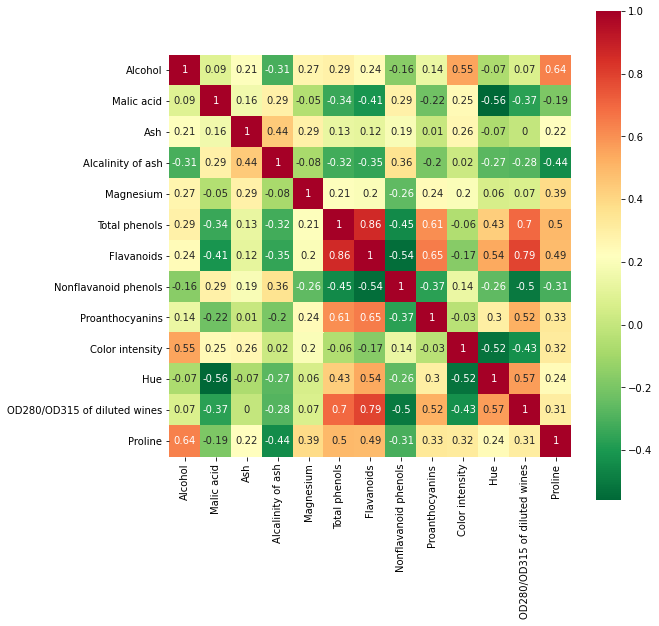

In [17]:
# Correlation Heatmap
correlation = wine.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()

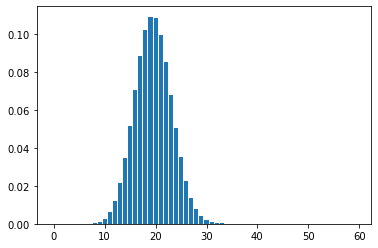

In [63]:
#binom
from scipy.stats import binom, norm
#for n in range(13):
dataL1=winenormMat[:,0]
fig, ax = plt.subplots(1, 1)
class_ind=np.where(classLabels.flatten()==0)
class_data = dataL1[class_ind]
n, p = 59, 59/178
r_values = list(range(n+1))
mean, var = binom.stats(n, p)
dist = [binom.pmf(r, n, p) for r in r_values ] 
ax = plt.bar(r_values, dist) 


#     #fig2, ax2 = plt.subplots(1, 1)
#     class_ind=np.where(np.array(classLabels)==1)
#     class_data = dataL1[class_ind]
#     n, p = 100, 2/3
#     r_values = list(range(n+1))
#     mean, var = binom.stats(n, p)
#     dist = [binom.pmf(r, n, p) for r in r_values ]
#     ax1 = plt.bar(r_values, dist) 
#     plt.title('data column %d binomial with chosen class vs rest class'%n)
#     plt.show()


mutivariate normal distrubution